In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
def plot_polynomial (xmin, xmax, coef, color='C1'):
    xs = np.linspace(xmin, xmax, num=500)
    ys = np.zeros_like(xs)
    for p, c in enumerate (coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, ys, color=color)

In [4]:
X0 = np.array([[2], [7], [9], [3], [10], [6], [1], [8]])

In [5]:
ones = np.ones_like(X0)

In [14]:
X = np.concatenate((X0, ones), axis=1)

In [15]:
X

array([[ 2,  1],
       [ 7,  1],
       [ 9,  1],
       [ 3,  1],
       [10,  1],
       [ 6,  1],
       [ 1,  1],
       [ 8,  1]])

In [16]:
Y = np.array([[13], [35], [41], [19], [45], [28], [10], [55]])

In [18]:
Y

array([[13],
       [35],
       [41],
       [19],
       [45],
       [28],
       [10],
       [55]])

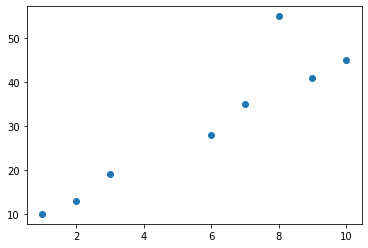

In [22]:
 plt.scatter(X0,Y);plt.show()

# Normal Equation

In [23]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [24]:
theta

array([[4.40880503],
       [5.39937107]])

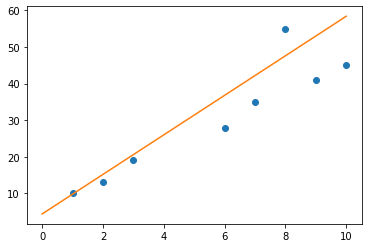

In [27]:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta)
plt.show()

# Gradient Descent 

In [32]:
m = X.shape[0]

In [33]:
m

8

In [47]:
theta_gd = np.random.normal(size=2).reshape([2,1])

In [74]:
theta_gd

array([[4.40880503],
       [5.39937107]])

 learning_rate = 0.02

In [59]:
def grad_cal(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """    
    g = 1/m * X.T.dot(X.dot(theta_gd) - Y)
    return g.reshape(theta_gd.shape)

In [60]:
def loss(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return 1/(2*m) * np.sum((X.dot(theta_gd) - Y)**2)

In [63]:
for i in range(10000):
    grad_value = grad_cal(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    if (i+1)%1000 == 0:
        print(loss(X, Y, theta_gd, m))

16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216
16.263364779874216


In [64]:
print(theta_gd)

[[4.40880503]
 [5.39937107]]


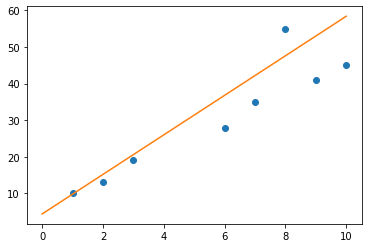

In [66]:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta_gd)
plt.show()

# Predict

In [67]:
def predict(X):
    return X.dot(theta)

In [68]:
X_new_1 = np.array([[20,1]])

In [69]:
predict(X_new_1)

array([[93.5754717]])

In [70]:
X_new_2 = np.array([[40,1]])

In [71]:
predict(X_new_2)

array([[181.75157233]])

In [72]:
X_new_3 = np.array([[7,1]])

In [73]:
predict(X_new_3)

array([[36.26100629]])